<a href="https://colab.research.google.com/github/pabelon12/Proyecto_IAN02/blob/main/IA/proyecto_inteligencia_artificial_N2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar librerias
import numpy as np # para trabajar con arreglos numericos
import tensorflow as tf # Libreria de google para DL
import matplotlib.pyplot as grafico # Para hacer plots de nuestros graficos
import pandas as pd # Carga set de datos
import seaborn as sn # Gráficos estadísticos: visualizaciones de nuestro modelo
import joblib #til para guardar modelos
from google.colab import files # Para subir archivos o descargar
from google.colab import drive # para guardar mi informacion y ya no estar a cada rato cargar la infomarcion
from PIL import Image

In [2]:
bankloanSet = pd.read_csv('bankloan.csv')# cargar la data

In [3]:
bankloanSet.head()# mostrar la data PRIMERAS FILAS DL DATAFRAME

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
pd.value_counts(bankloanSet['Personal.Loan'])# Préstamo personal  frecuencia de cada valor en la columna 1= si 0 = no

<ipython-input-4-684d5415fbc4>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(bankloanSet['Personal.Loan'])# Préstamo personal  frecuencia de cada valor en la columna 1= si 0 = no


,count
Personal.Loan,
0,4520
1,480


In [5]:
pd.value_counts(bankloanSet['Securities.Account'])# Cuenta Valor 1 = si 0 0 no

<ipython-input-5-0b8482f99c65>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(bankloanSet['Securities.Account'])# Cuenta Valor 1 = si 0 0 no


,count
Securities.Account,
0,4478
1,522


In [6]:
pd.value_counts(bankloanSet['CD.Account'])#Cuenta de certificado  CD  1 = si 0 0 no

<ipython-input-6-712331d5a0d5>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(bankloanSet['CD.Account'])#Cuenta de certificado  CD  1 = si 0 0 no


,count
CD.Account,
0,4698
1,302


In [7]:
pd.value_counts(bankloanSet['Online'])#Realizar pagos en linea 1 = si 0 0 no

<ipython-input-7-8e5af8afa4a2>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(bankloanSet['Online'])#Realizar pagos en linea 1 = si 0 0 no


,count
Online,
1,2984
0,2016


In [8]:
pd.value_counts(bankloanSet['CreditCard'])#tienen tarjeta de credito 1 = si 0 0 no

<ipython-input-8-469ec16d770f>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(bankloanSet['CreditCard'])#tienen tarjeta de credito 1 = si 0 0 no


,count
CreditCard,
0,3530
1,1470


In [9]:
from sklearn.preprocessing import LabelEncoder #importar la clase LabelEncoder de la biblioteca scikit-learn, biblioteca de aprendizaje automático en Python.

In [10]:
lEncoder = LabelEncoder()#se utiliza para codificar los colores en números

In [11]:
bankloanSet['Personal.Loan'] = lEncoder.fit_transform(bankloanSet['Personal.Loan']) # Ajustar y transformar, Reemplazar la columna original,para que se mantenga

In [12]:
bankloanSet['Securities.Account'] = lEncoder.fit_transform(bankloanSet['Securities.Account'])#utiliza comúnmente en Python para manipular y analizar datos.

In [13]:
bankloanSet['CD.Account'] = lEncoder.fit_transform(bankloanSet['CD.Account'])

In [14]:
bankloanSet['Online'] = lEncoder.fit_transform(bankloanSet['Online'])

In [15]:
bankloanSet['CreditCard'] = lEncoder.fit_transform(bankloanSet['CreditCard'])

In [16]:
bankloanSet.info()  #informacion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [17]:
bankloanSet.describe()# resumen estadístico de las columnas numéricas del DataFrame

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Axes: >

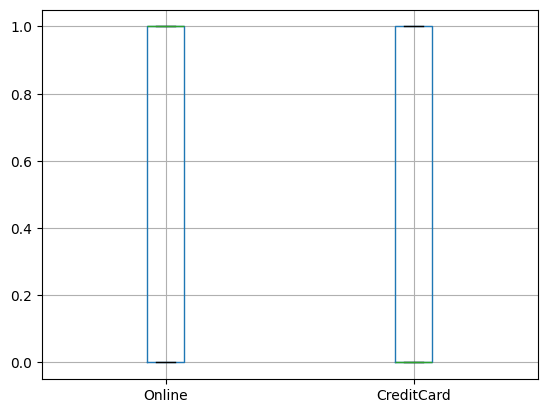

In [18]:
bankloanSet.boxplot(column = ['Online', 'CreditCard'])#se utiliza para generar un diagrama de caja (boxplot)

In [19]:
yEntrenamiento = bankloanSet['CreditCard']#crear una variable almacena los valores de la columna en DataFrame
yEntrenamiento

,CreditCard
0,0
1,0
2,0
3,0
4,1
...,...
4995,0
4996,0
4997,0
4998,0


In [20]:
xEntrenamiento = bankloanSet.drop(columns= 'CreditCard')#crear una variable almacena los valores de la columna en DataFrame
xEntrenamiento

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1


In [21]:
from sklearn.model_selection import train_test_split#utiliza para importar la función de la biblioteca popular para el aprendizaje automático en Python.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(xEntrenamiento, yEntrenamiento, train_size = 0.80, random_state=0)# código divide tus datos en conjuntos de entrenamiento y prueba

In [23]:
from sklearn.tree import DecisionTreeClassifier# importa un modelo de clasificación basado en árboles de decisión

In [24]:
arbol = DecisionTreeClassifier(max_depth= 5, criterion= 'entropy', random_state= 0)#las divisiones, y asegurando que el modelo sea reproducible al establecer una semilla aleatoria.

In [25]:
arbolEntrenamiento = arbol.fit(x_train, y_train)#arbolEntrenamiento = arbol.fit(x_train, y_train)

In [26]:
arbolEntrenamiento#enseñarle el entrenamiento

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [27]:
prediccion = arbolEntrenamiento.predict(x_test)#utiliza para obtener las predicciones permite evaluar cómo se desempeña el modelo con datos que no ha visto antes.

In [28]:
prediccion

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
x_test.shape#se utiliza para interpretar modelos de aprendizaje automático

(1000, 13)

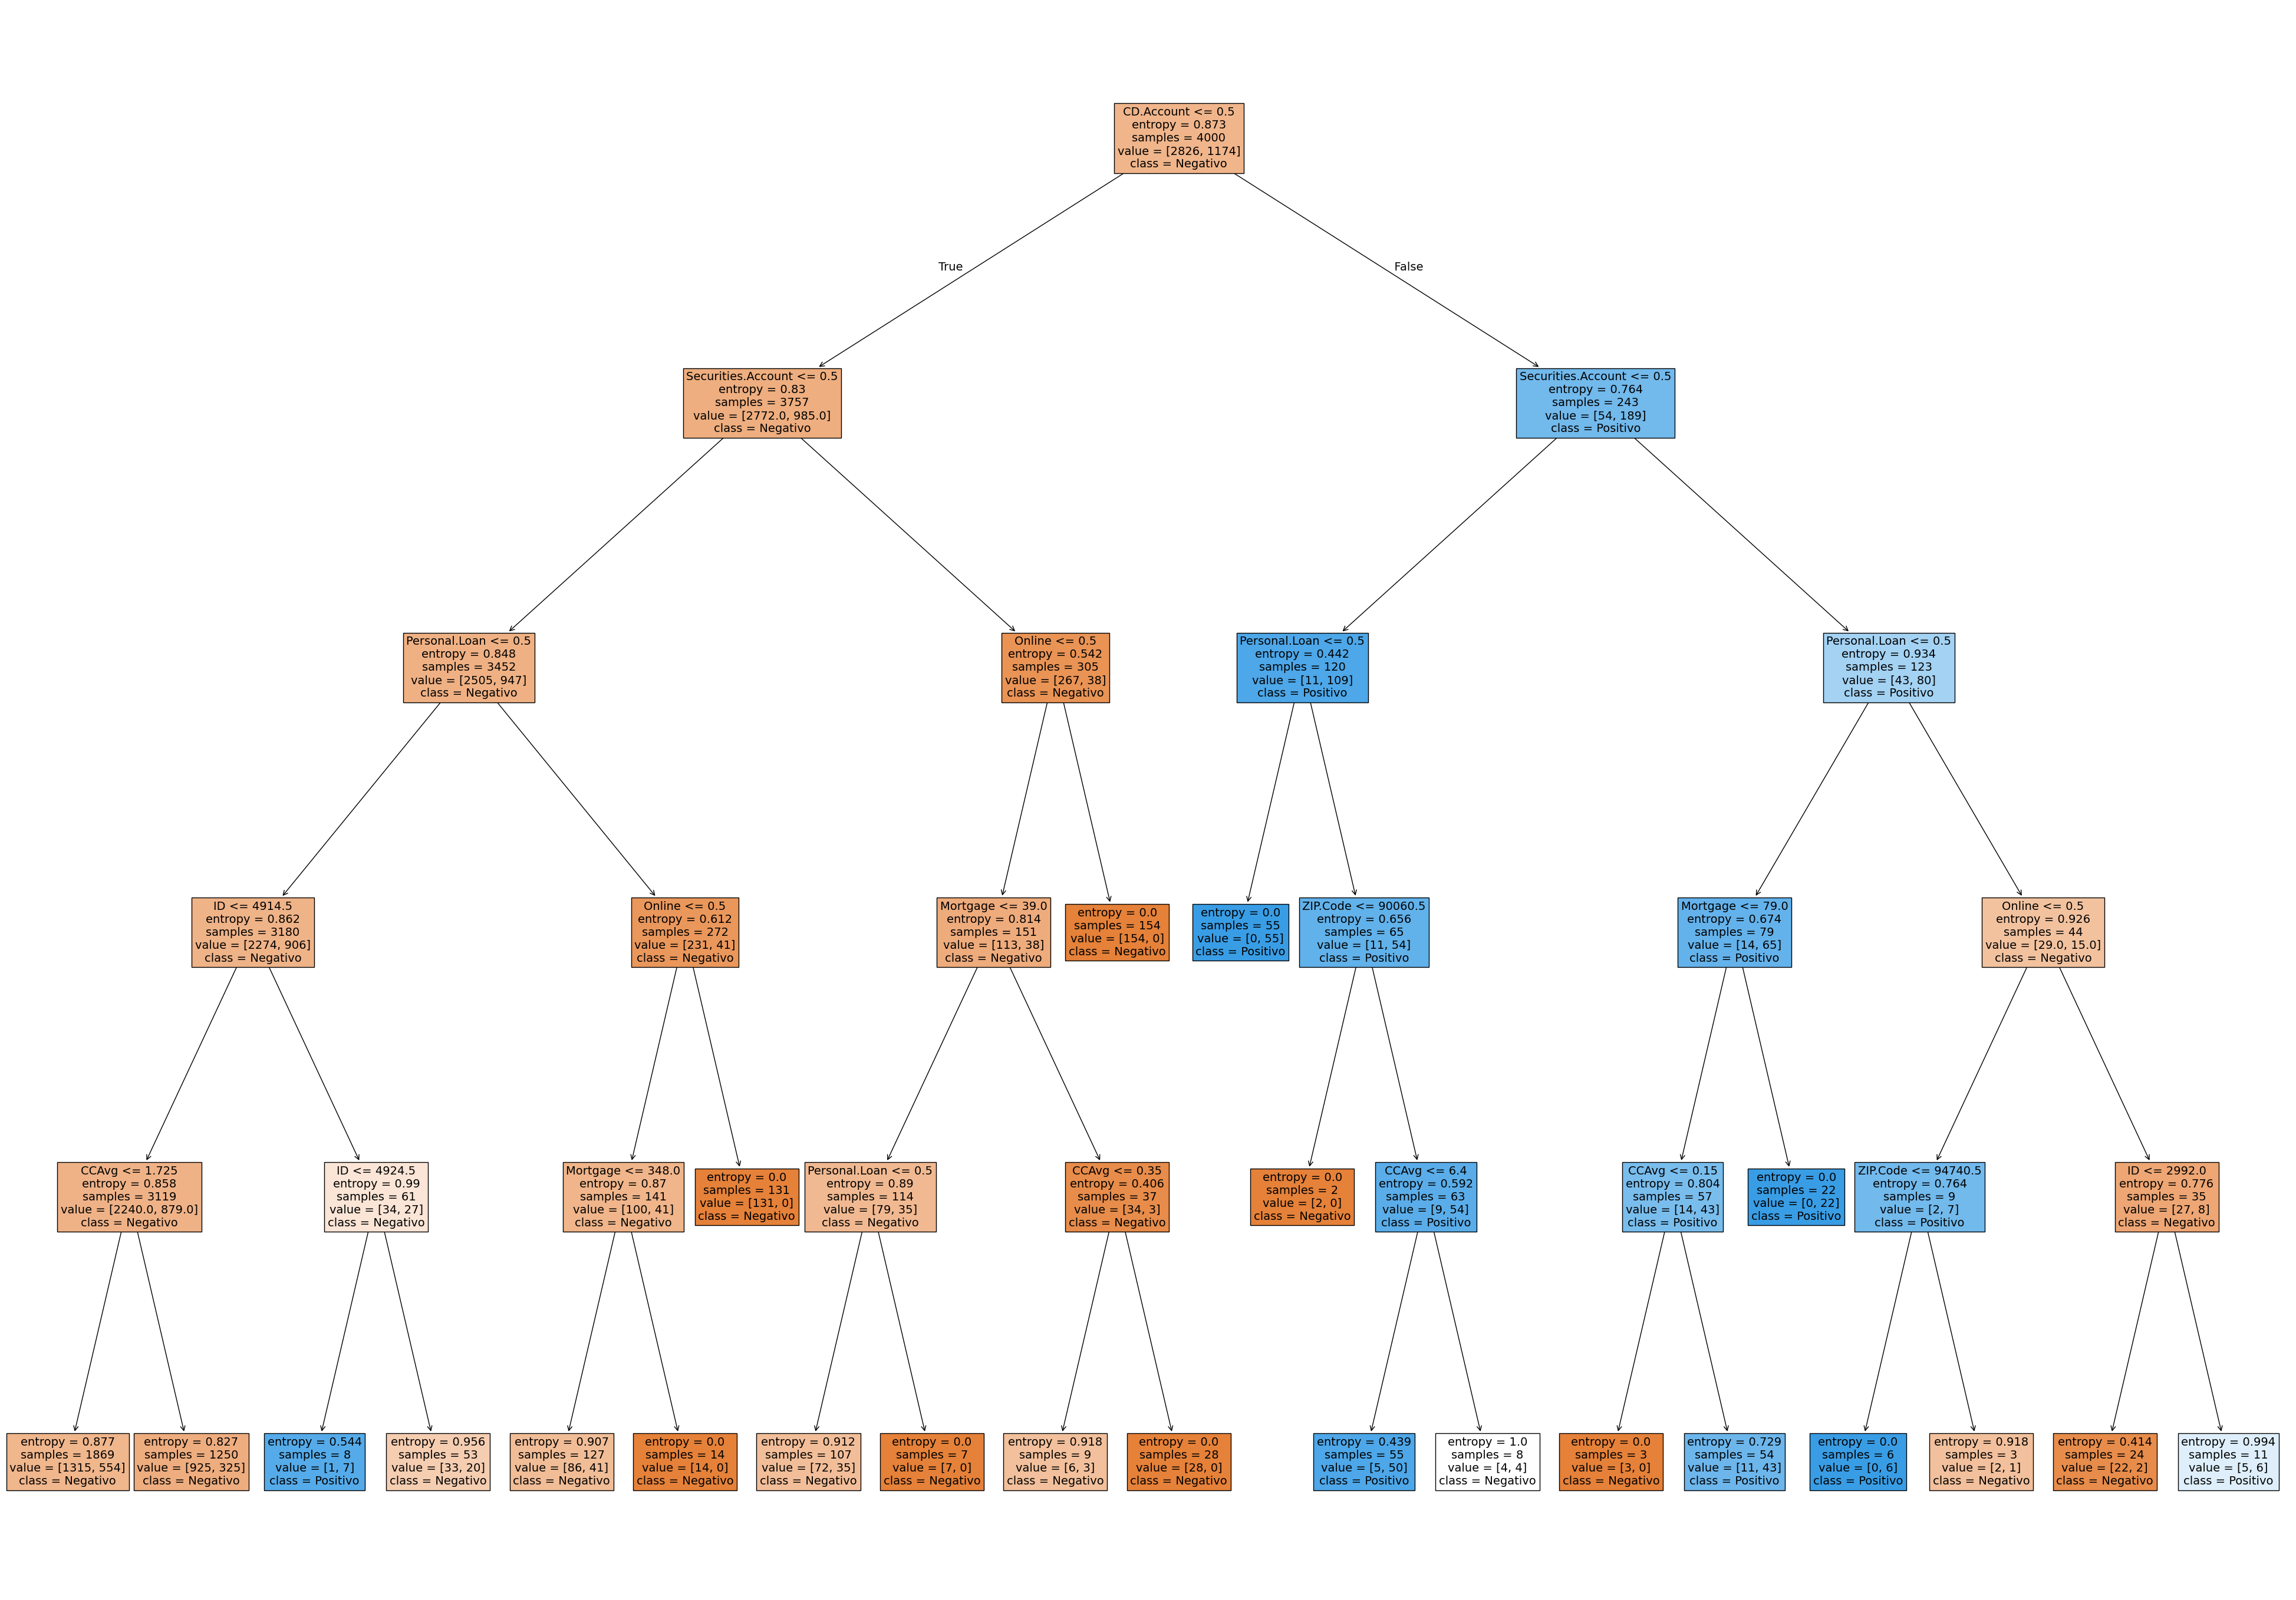

In [30]:
#permite ver cómo el modelo toma decisiones basadas en las características de entrada.
#Esto es especialmente útil para interpretar modelos de árbol de decisión, ya que puedes
#ver claramente los criterios de división y cómo se llega a las predicciones.

arbolFigura = grafico.figure(figsize=(50,35))
from sklearn import tree
tree.plot_tree(arbolEntrenamiento,
               feature_names=list(x_train.columns.values),
               class_names=['Negativo', 'Positivo'],
               filled=True,
               fontsize=14)
grafico.show()

In [31]:
arbolFigura.savefig('arbolBanco.jpg') #guarda la imagen

In [32]:
image = Image.open('arbolBanco.jpg')#abrir la imagen
image.save('arbolBanco.pdf', "PDF", resolution=100.0) # convertir a pdf

In [33]:
files.download('arbolBanco.pdf')# y generar la automatizacion de la descarga automatica
drive.mount('/content/drive')# para guardar mi trabajo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mounted at /content/drive


In [34]:
df = pd.DataFrame({'Columna1': [1, 2, 3], 'Columna2': [4, 5, 6]}) #creamos un data frame
df.to_csv('/content/drive/My Drive/resultado.csv', index=False) # Guardar en Google Drive